In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
mode_gen=df["Gender"].mode()
df["Gender"]=df["Gender"].fillna(mode_gen[0])

In [6]:
mode_mar=df["Married"].mode()
df["Married"]=df["Married"].fillna(mode_mar[0])

In [7]:
mode_se=df["Self_Employed"].mode()
df["Self_Employed"]=df["Self_Employed"].fillna(mode_se[0])

In [8]:
mode_LAt=df["Loan_Amount_Term"].mode()
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(mode_LAt[0])

In [9]:
mode_Dep=df["Dependents"].mode()
df["Dependents"]=df["Dependents"].fillna(mode_Dep[0])

In [10]:
mode_ch=df["Credit_History"].mode()
df["Credit_History"]=df["Credit_History"].fillna(mode_ch[0])

In [11]:
mean_la=df["LoanAmount"].mean()
df["LoanAmount"]=df["LoanAmount"].fillna(mean_la)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.drop("Loan_ID",axis=1,inplace=True)

In [14]:
x=pd.get_dummies(df["Gender"])
df["Gender"]=x["Female"]

In [15]:
x1=pd.get_dummies(df["Married"])
df["Married"]=x1["No"]

In [16]:
x2=pd.get_dummies(df["Education"])
df["Education"]=x2["Graduate"]

In [17]:
x3=pd.get_dummies(df["Self_Employed"])
df["Self_Employed"]=x3["No"]

In [18]:
x4=pd.get_dummies(df["Loan_Status"])
df["Loan_Status"]=x4["Y"]

In [19]:
x5=pd.get_dummies(df["Property_Area"])
df["Property_Area=Rural"]=x5["Rural"]
df["Property_Area=Urban"]=x5["Urban"]
df.drop("Property_Area",axis=1,inplace=True)

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [21]:
de = preprocessing.LabelEncoder()
df["Dependents"]=de.fit_transform(df["Dependents"].astype('str'))
df.dtypes

Gender                   uint8
Married                  uint8
Dependents               int32
Education                uint8
Self_Employed            uint8
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Loan_Status              uint8
Property_Area=Rural      uint8
Property_Area=Urban      uint8
dtype: object

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model=LogisticRegression()

In [26]:
model.fit(x_train,y_train)

C:\Users\Administrator\download\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=model.predict(x_test)

Accuracy is: 0.8292682926829268
[[15 18]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



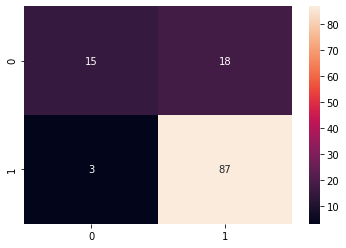

In [28]:
from sklearn.metrics import classification_report
acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",acc)
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

In [29]:
df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64